Outlier Detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('./datasets/processed_data.csv')

In [14]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,0,3,0,4,1,1,2.17,1,5953
1,4,1387,0,0,0,1,1,1,2.33,1,5953
2,0,1213,0,0,0,0,1,1,2.17,1,5956
3,5,1559,0,1,0,2,1,1,2.25,1,5955
4,5,1549,0,1,0,1,1,1,2.33,1,5955


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


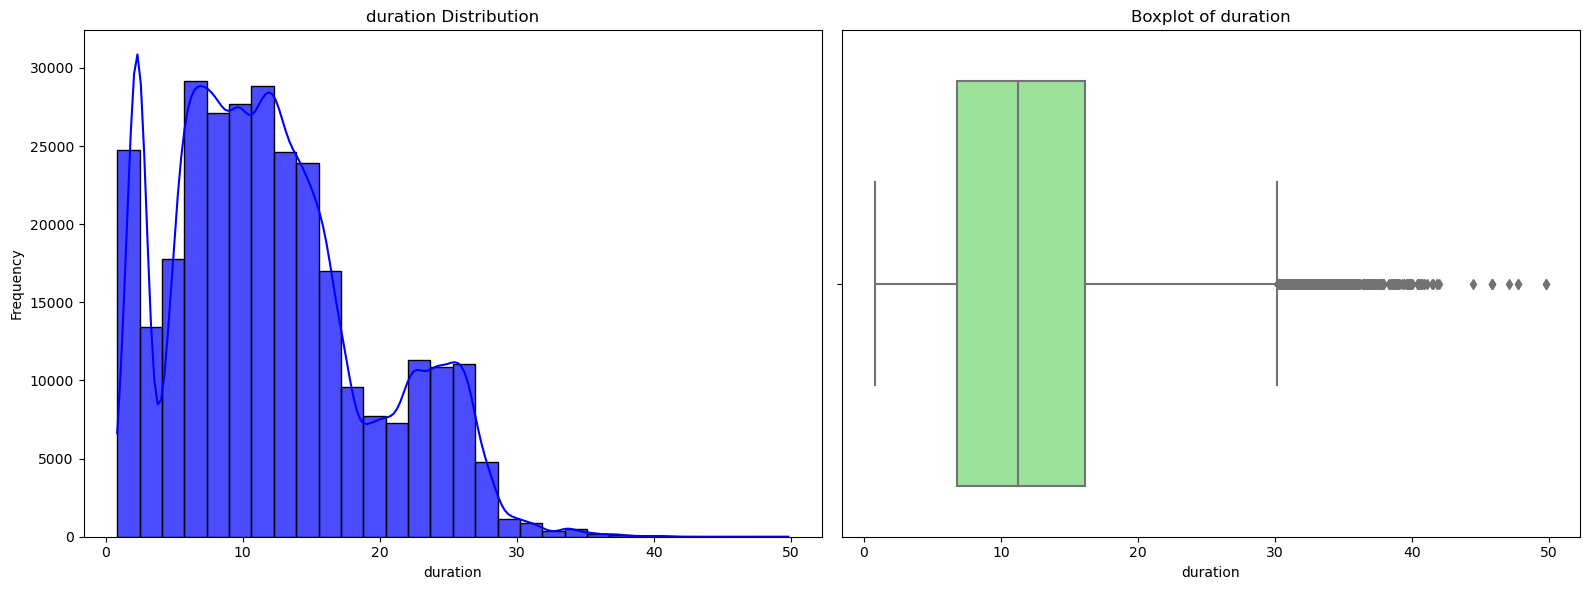

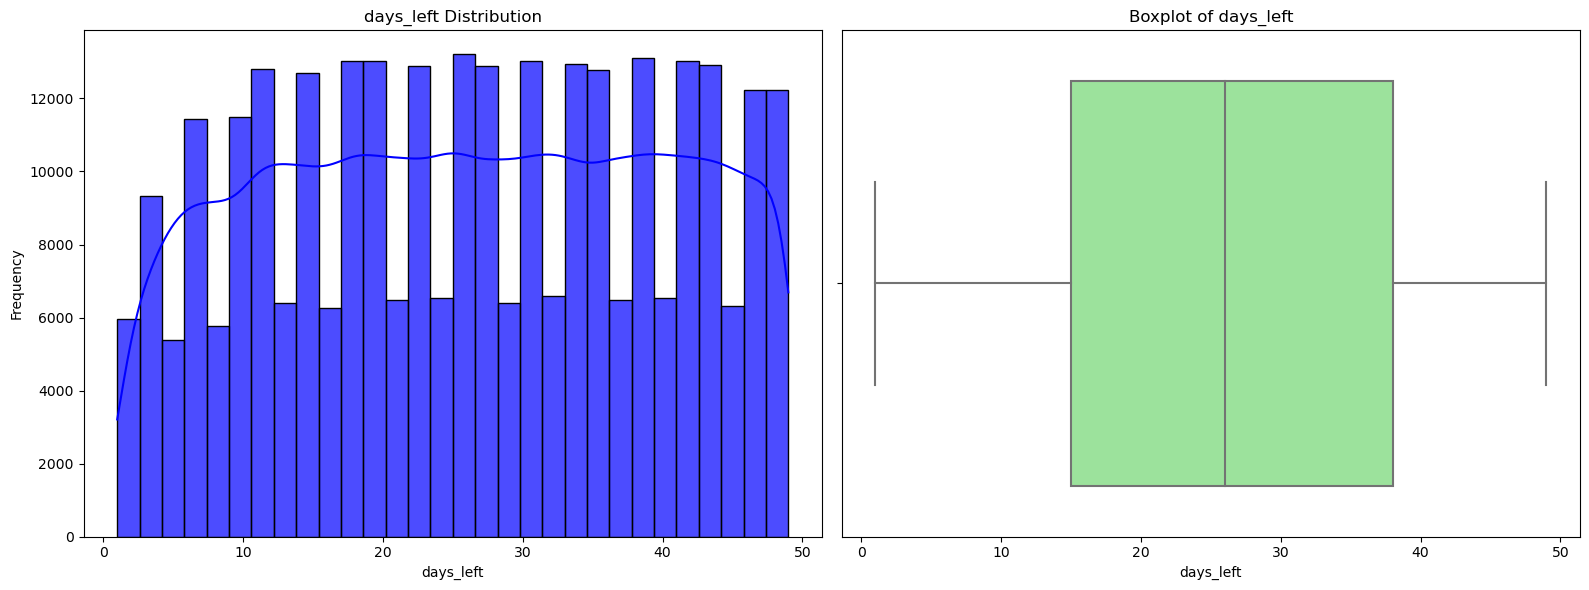

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features excluding 'price'
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [col for col in numeric_features if col != 'price']

# Plot settings
for feature in numeric_features:
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()


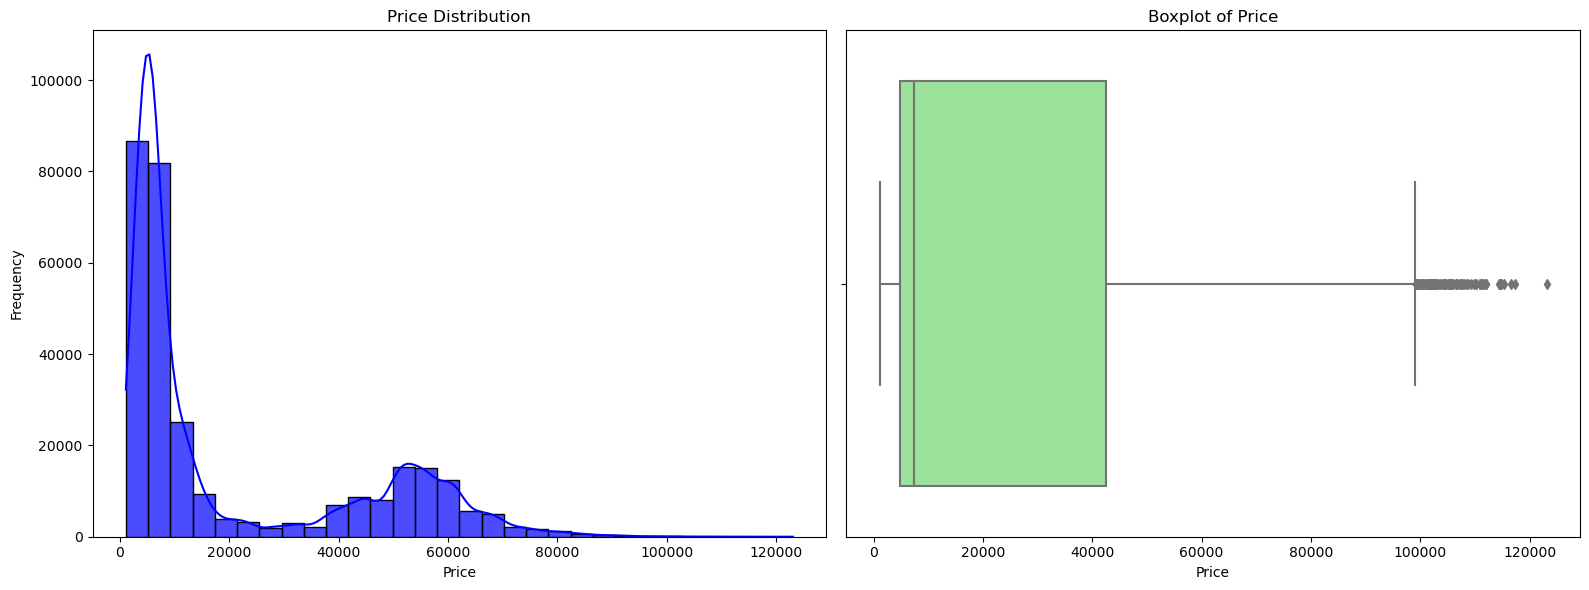

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(16, 6))

# plt.subplot(1, 2, 1)
# sns.histplot(df['price'], kde=True, bins=30, color='blue', alpha=0.7)
# plt.title('Price Distribution')
# plt.xlabel('Price')
# plt.ylabel('Frequency')

# plt.subplot(1, 2, 2)
# sns.boxplot(x=df['price'], color='lightgreen')
# plt.title('Boxplot of Price')
# plt.xlabel('Price')

# plt.tight_layout()
# plt.show()

In [ ]:
# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
# print(f"Number of outliers: {len(outliers)}")

Number of outliers: 123


In [53]:
# Select numeric features excluding 'price'
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [col for col in numeric_features if col != 'price']
outliers_indices = set()
outliers_per_feature = {}

# Identify and collect indices of outliers for each numeric feature
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find indices of outliers for the current feature
    feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outliers_per_feature[feature] = feature_outliers.index.tolist()
    outliers_indices.update(feature_outliers.index)  # Add indices to the set to avoid duplicates

# Print outliers for each feature
for feature, indices in outliers_per_feature.items():
    print(f"Feature: {feature}")
    if indices:
        # print(f"Outliers indices: {indices}")
        print(f"Number of outliers: {len(indices)}")
    else:
        print("No outliers found.")
    print("-" * 40)

# Print total number of unique outliers
print(f"Total unique outlier rows: {len(outliers_indices)}")



Feature: duration
Number of outliers: 2110
----------------------------------------
Feature: days_left
No outliers found.
----------------------------------------
Total unique outlier rows: 2110


In [54]:
# Drop all outlier rows
if outliers_indices:
    df = df.drop(index=outliers_indices)
    print(f"Dropped {len(outliers_indices)} outlier rows.")
else:
    print("No outliers found.")

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

Dropped 2110 outlier rows.


In [ ]:
# outliers_idx = outliers.index.tolist()

In [ ]:
# if outliers_idx:
#     df = df.drop(outliers_idx)
#     print(f"Dropped {len(outliers_idx)} outlier rows.")
# else:
#     print("No outliers found.")
# df.reset_index(drop=True, inplace=True)

No outliers found.


In [55]:
df.shape

(298043, 11)

In [56]:
stops_mapping = {'zero': 0 , 'one': 1, 'two_or_more': 2}
df['stops'] = df['stops'].map(stops_mapping)

In [57]:
df['stops'].value_counts()

1    249573
0     36004
2     12466
Name: stops, dtype: int64

In [58]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298043 non-null  object 
 1   flight            298043 non-null  object 
 2   source_city       298043 non-null  object 
 3   departure_time    298043 non-null  object 
 4   stops             298043 non-null  int64  
 5   arrival_time      298043 non-null  object 
 6   destination_city  298043 non-null  object 
 7   class             298043 non-null  object 
 8   duration          298043 non-null  float64
 9   days_left         298043 non-null  int64  
 10  price             298043 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 25.0+ MB


In [60]:
time_mapping = {
    'Early_Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late_Night': 5
}

df['arrival_time'] = df['arrival_time'].map(time_mapping)
df['departure_time'] = df['departure_time'].map(time_mapping)

In [61]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,3,0,4,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,0,0,1,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,0,0,0,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,1,0,2,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,1,0,1,Mumbai,Economy,2.33,1,5955


In [62]:
from sklearn.preprocessing import LabelEncoder

le_class = LabelEncoder()
le_fligh = LabelEncoder()

df['class'] = le_class.fit_transform(df['class'])
df['flight'] = le_fligh.fit_transform(df['flight'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298043 non-null  object 
 1   flight            298043 non-null  int32  
 2   source_city       298043 non-null  object 
 3   departure_time    298043 non-null  int64  
 4   stops             298043 non-null  int64  
 5   arrival_time      298043 non-null  int64  
 6   destination_city  298043 non-null  object 
 7   class             298043 non-null  int32  
 8   duration          298043 non-null  float64
 9   days_left         298043 non-null  int64  
 10  price             298043 non-null  int64  
dtypes: float64(1), int32(2), int64(5), object(3)
memory usage: 22.7+ MB


In [ ]:
# city_mapping = {
#     'Delhi': 0,
#     'Mumbai': 1,
#     'Bangalore': 2,
#     'Kolkata': 3,
#     'Hyderabad': 4,
#     'Chennai': 5
# }

# df['source_city'] = df['source_city'].map(city_mapping)
# df['destination_city'] = df['destination_city'].map(city_mapping)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298043 non-null  object 
 1   flight            298043 non-null  int32  
 2   source_city       298043 non-null  object 
 3   departure_time    298043 non-null  int64  
 4   stops             298043 non-null  int64  
 5   arrival_time      298043 non-null  int64  
 6   destination_city  298043 non-null  object 
 7   class             298043 non-null  int32  
 8   duration          298043 non-null  float64
 9   days_left         298043 non-null  int64  
 10  price             298043 non-null  int64  
dtypes: float64(1), int32(2), int64(5), object(3)
memory usage: 22.7+ MB


In [ ]:
# **Using pandas get_dummies() for one-hot encoding**
from sklearn.preprocessing import OneHotEncoder

df_pandas_encoded = pd.get_dummies(df, columns=['airline','source_city','destination_city'], drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

# **Using sklearn's OneHotEncoder**
# Define the column to encode
categorical_columns = ['airline','source_city','destination_city']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded columns with the original DataFrame (excluding original categorical column)
df_sklearn_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

print(f"One-Hot Encoded Data using scikit-learn:\n{df_sklearn_encoded}\n")

In [47]:
df_sklearn_encoded['source_city'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [66]:
df_sklearn_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   flight                      298043 non-null  int32  
 1   departure_time              298043 non-null  int64  
 2   stops                       298043 non-null  int64  
 3   arrival_time                298043 non-null  int64  
 4   class                       298043 non-null  int32  
 5   duration                    298043 non-null  float64
 6   days_left                   298043 non-null  int64  
 7   price                       298043 non-null  int64  
 8   airline_Air_India           298043 non-null  float64
 9   airline_GO_FIRST            298043 non-null  float64
 10  airline_Indigo              298043 non-null  float64
 11  airline_SpiceJet            298043 non-null  float64
 12  airline_Vistara             298043 non-null  float64
 13  source_city_Ch

In [ ]:
# df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,1408,0,3,0,4,1,1,2.17,1,5953
1,SpiceJet,1387,0,0,0,1,1,1,2.33,1,5953
2,AirAsia,1213,0,0,0,0,1,1,2.17,1,5956
3,Vistara,1559,0,1,0,2,1,1,2.25,1,5955
4,Vistara,1549,0,1,0,1,1,1,2.33,1,5955


In [67]:
X=df_sklearn_encoded.drop(['price'],axis=1)
y=df_sklearn_encoded['price']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 4 to 5
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flight            300153 non-null  int64  
 1   source_city       300153 non-null  int64  
 2   departure_time    300153 non-null  int64  
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  int64  
 5   destination_city  300153 non-null  int64  
 6   class             300153 non-null  int64  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 25.2 MB


In [16]:
X = df.drop('price', axis=1)
y = df['price']

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 22.9 MB


##### Feature Selection

[0.00760841 0.02006521 0.00826276 0.00373877 0.03298109 0.00404997
 0.01018526 0.87968937 0.01486332 0.01855582]


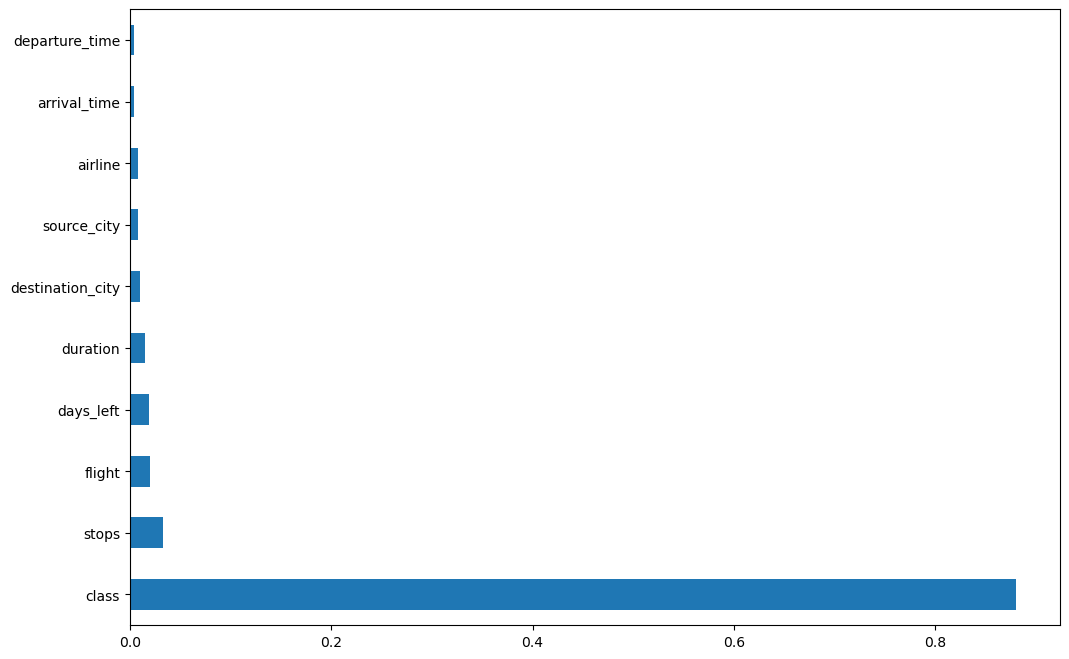

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)

# Plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [19]:

# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

# Compute VIF on X
calc_vif(X)

,variables,VIF
0,airline,6.851544
1,flight,12.588187
2,source_city,2.717425
3,departure_time,2.667545
4,stops,8.209630
5,arrival_time,4.397014
6,destination_city,2.867454
7,class,2.926638
8,duration,5.644968
9,days_left,4.108094


In [20]:
X = X.drop(['flight'],axis=1)

In [21]:
# Compute VIF on X
calc_vif(X)

,variables,VIF
0,airline,3.487229
1,source_city,2.717381
2,departure_time,2.629278
3,stops,7.997500
4,arrival_time,4.272678
5,destination_city,2.867394
6,class,2.923605
7,duration,5.295933
8,days_left,4.002405


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((210107, 9), (90046, 9), (210107,), (90046,))

In [23]:
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

r2_scores = {}

def evaluate_metrics(X_train, X_test, y_train_pred, y_test_pred,model_name = None):
    n_train, k_train = X_train.shape
    n_test, k_test = X_test.shape

    # MSE and RMSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # R2 and Adjusted R2
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    if model_name is not None:
        r2_scores[model_name] = r2_test

    adj_r2_train = adjusted_r2_score(r2_train, n_train, k_train)
    adj_r2_test = adjusted_r2_score(r2_test, n_test, k_test)

    # MAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Print results
    print(f'Train MSE: {mse_train}, Test MSE: {mse_test}')
    print(f'Train RMSE: {rmse_train}, Test RMSE: {rmse_test}')
    print(f'Train R2: {r2_train}, Test R2: {r2_test}')
    print(f'Train Adjusted R2: {adj_r2_train}, Test Adjusted R2: {adj_r2_test}')
    print(f'Train MAE: {mae_train}, Test MAE: {mae_test}')

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
y_pred = rf_regressor.predict(X_test)
y_train_pred = rf_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Random Forest')

Train MSE: 1261696.795293982, Test MSE: 7876232.17997419
Train RMSE: 1123.2527744430379, Test RMSE: 2806.462574126758
Train R2: 0.9975520513772119, Test R2: 0.9846964351603408
Train Adjusted R2: 0.9975519465135652, Test Adjusted R2: 0.9846949054157547
Train MAE: 426.9274878786904, Test MAE: 1100.4947409714655


Feature Selection

In [16]:
def train_and_evaluate_selected(model, X_selected, y_le):
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_le, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    n_train, k_train = X_train.shape
    n_test, k_test = X_test.shape

    # MSE and RMSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # R2 and Adjusted R2
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    adj_r2_train = adjusted_r2_score(r2_train, n_train, k_train)
    adj_r2_test = adjusted_r2_score(r2_test, n_test, k_test)

    # MAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Print results
    print(f'Train MSE: {mse_train}, Test MSE: {mse_test}')
    print(f'Train RMSE: {rmse_train}, Test RMSE: {rmse_test}')
    print(f'Train R2: {r2_train}, Test R2: {r2_test}')
    print(f'Train Adjusted R2: {adj_r2_train}, Test Adjusted R2: {adj_r2_test}')
    print(f'Train MAE: {mae_train}, Test MAE: {mae_test}')

In [19]:
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['price'].abs().sort_values(ascending=False)

In [20]:
# top k features
for k in range(1, 11):
    selected_features = correlation_with_target[1:].head(k).index
    print(f'Top {k} features: {selected_features}')
    train_and_evaluate_selected(rf_regressor, X[selected_features], y)
    print('\n')
    

Top 1 features: Index(['class'], dtype='object')
Train MSE: 61224245.18608812, Test MSE: 60276934.558721095
Train RMSE: 7824.592333539692, Test RMSE: 7763.822161713977
Train R2: 0.8807649507750689, Test R2: 0.8818681115003154
Train Adjusted R2: 0.8807643830404867, Test Adjusted R2: 0.8818667990258579
Train MAE: 4892.370060783642, Test MAE: 4856.114852654035


Top 2 features: Index(['class', 'flight'], dtype='object')
Train MSE: 40185379.2803154, Test MSE: 40540767.65099298
Train RMSE: 6339.193898305635, Test RMSE: 6367.163234203516
Train R2: 0.9217384279373737, Test R2: 0.9205474286491264
Train Adjusted R2: 0.9217376826529499, Test Adjusted R2: 0.9205456631541294
Train MAE: 3869.0124039176717, Test MAE: 3879.85835495892


Top 3 features: Index(['class', 'flight', 'airline'], dtype='object')
Train MSE: 40185379.27616332, Test MSE: 40540617.98570939
Train RMSE: 6339.193897978143, Test RMSE: 6367.151481291253
Train R2: 0.92173842794546, Test R2: 0.92054772196601
Train Adjusted R2: 0.92173